In [ ]:
pip install scikit-learn

In [ ]:
## IMPORT LIBRARY

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sklearn

warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
df=pd.read_excel(r"C:\Users\Admin\Desktop\project4.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [5]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [6]:
df.shape

(541, 12)

In [7]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [8]:
# Drop unnessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [10]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
            Memory         RAM     Battery_     AI Lens  Mobile Height  \
count  541.000000  541.000000   541.000000  541.000000     541.000000   
mean   110.550832    5.397412  4871.587800    0.062847      16.431201   
std     60.600694    1.984923   780.148862    0.242911       2.523553   
min     16.000000    2.000000   800.000000    0.000000       4.500000   
25%     64.000000    4.000000  5000.000000    0.000000      16.510000   
50%    128.000000    6.000000  5000.000000    0.000000      16.710000   
75%    128.000000    8.000000  5000.000000    0.000000      16.940000   
max    256.000000    8.000000  7000.000000    1.000000      41.940000   

              Prize  
count    541.000000  
mean   16228.375231  
std    10793.588322  
min      920.000000  
25%     9290.000000  
50%    13499.000000  
75%    19280.000000  
max    80999.000000  


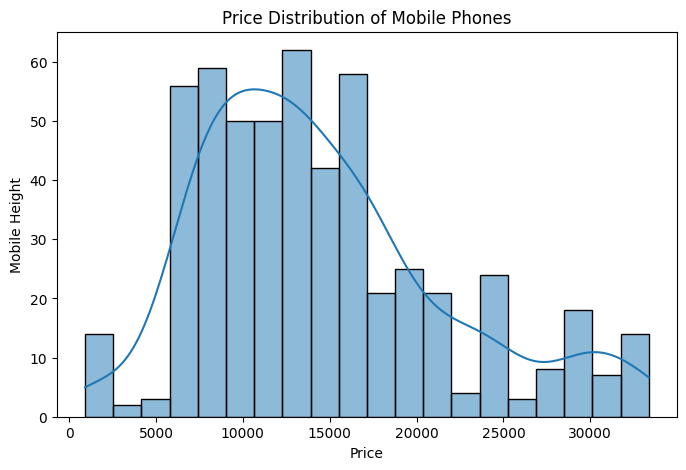

In [124]:
# Distribution of Prices
plt.figure(figsize=(8, 5))
sns.histplot(df["Prize"], bins=20, kde=True)
plt.title("Price Distribution of Mobile Phones")
plt.xlabel("Price")
plt.ylabel("Mobile Height")
plt.show()

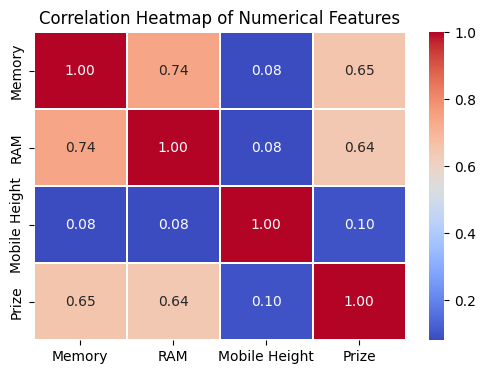

In [138]:
# Correlation Heatmap (only numerical columns)
num_cols = ["Memory", "RAM","Mobile Height","Prize"]
df_num = df[num_cols]

# Compute correlation matrix
corr_matrix = df_num.corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

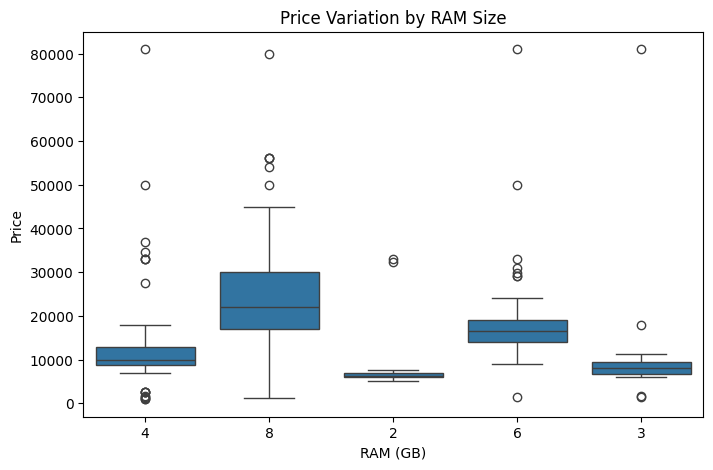

In [13]:
# Box plot of Price by RAM
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["RAM"].astype(str), y=df["Prize"])
plt.title("Price Variation by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()

In [50]:
# Convert 'Rear Camera' and 'Front Camera' to numerical values
df['Rear Camera'] = df['Rear Camera'].str.extract(r'(\d+)').astype(float)
df['Front Camera'] = df['Front Camera'].str.extract(r'(\d+)').astype(float)

In [52]:
# Detect outliers using IQR method
numerical_cols = ['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize', 'Rear Camera', 'Front Camera']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [54]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
# Replace outliers with NaN for further handling
for col in numerical_cols:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = np.nan

In [58]:
# Fill missing values (outliers) with median values
df.fillna(df.median(numeric_only=True), inplace=True)

In [60]:
# Ensure all categorical variables are converted using one-hot encoding
df = pd.get_dummies(df, columns=['Model', 'Colour', 'Processor_'], drop_first=True)

In [62]:
# Ensure all columns are numeric before correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

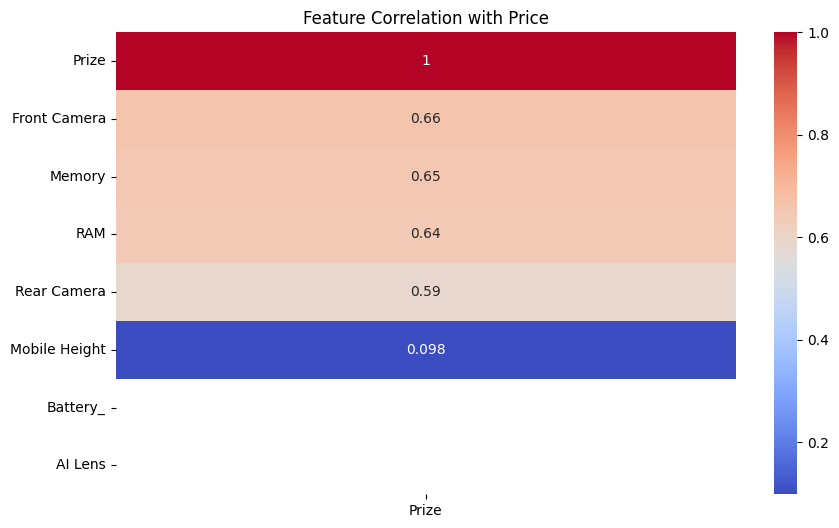

In [64]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr()['Prize'].sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Price")
plt.show()

In [66]:
# Save the cleaned dataset
df.to_csv(r"C:\Users\Admin\Desktop\project4.csv", index=False)

# Display final dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 590 entries, Memory to Processor__snapdragon 888
dtypes: bool(582), float64(8)
memory usage: 341.4 KB


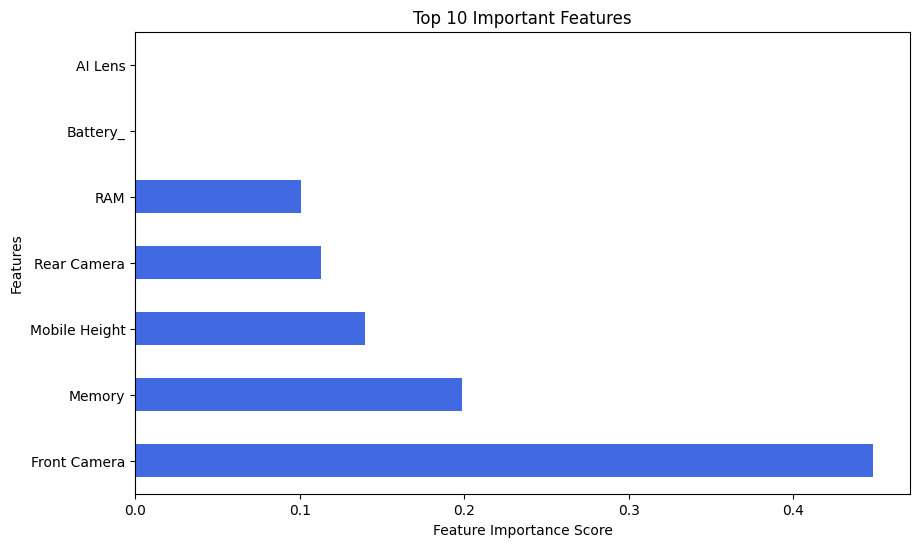

In [68]:
# Feature Importance using Random Forest
X = df_numeric.drop(columns=['Prize'])
y = df_numeric['Prize']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(10)

plt.figure(figsize=(10, 6))
important_features.plot(kind='barh', color='royalblue')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

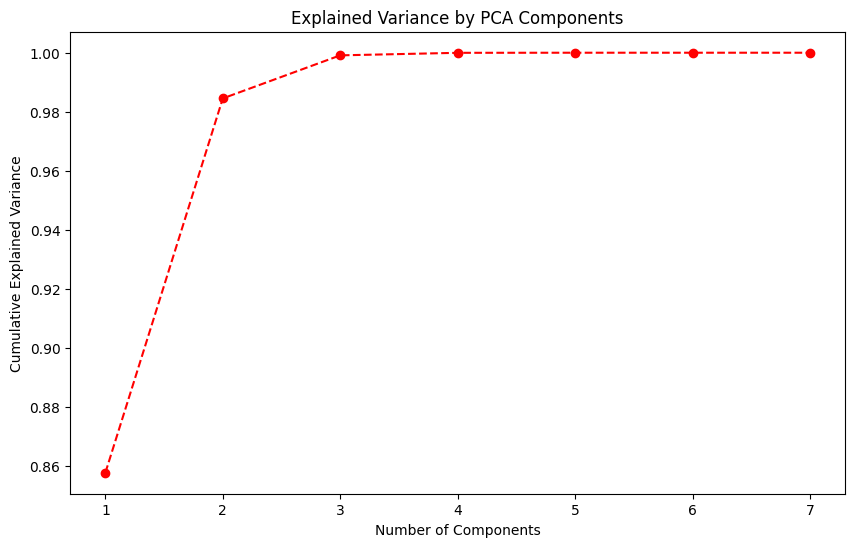

In [70]:
# Principal Component Analysis (PCA)
n_components = min(10, X.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance), marker='o', linestyle='--',color='red')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

In [72]:
# Save the cleaned dataset
df_numeric.to_csv(r"C:\Users\Admin\Desktop/cleaned_project4.csv", index=False)

In [74]:
# Display final dataset info
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Memory         541 non-null    float64
 1   RAM            541 non-null    float64
 2   Battery_       541 non-null    float64
 3   Rear Camera    541 non-null    float64
 4   Front Camera   541 non-null    float64
 5   AI Lens        541 non-null    float64
 6   Mobile Height  541 non-null    float64
 7   Prize          541 non-null    float64
dtypes: float64(8)
memory usage: 33.9 KB


In [ ]:
# Drop unnecessary column
df = df.drop(columns=["Unnaed: 0"], errors='ignore')

In [76]:
# Convert categorical variables into numerical representations
if "Colour" in df.columns:
    df["Colour"] = df["Colour"].astype("category").cat.codes
if "Processor_" in df.columns:
    df["Processor_"] = df["Processor_"].astype("category").cat.codes
if "Model" in df.columns:
    df["Model"] = df["Model"].astype("category").cat.codes

In [78]:
# Ensure camera columns are strings before extracting numeric values
df["Rear Camera"] = df["Rear Camera"].astype(str).str.extract("(\d+)").astype(float)
df["Front Camera"] = df["Front Camera"].astype(str).str.extract("(\d+)").astype(float)

In [80]:
# Fill missing values with 0 
df.fillna(0, inplace=True)# Define features and target variable
X = df.drop(columns=["Prize"])  # Features
y = df["Prize"]  # Target

In [82]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
# Make predictions
y_pred = model.predict(X_test)

In [88]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [90]:
# Print results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5155455.620741769
R^2 Score: 0.8914795081468149


In [92]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
# Print results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5155455.620741769
Root Mean Squared Error: 2270.56284227981
Mean Absolute Error: 1266.6961314984712
R^2 Score: 0.8914795081468149


In [96]:
# Feature Importance Analysis
feature_importances = model.feature_importances_
feature_names = X.columns

In [98]:
# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

In [ ]:
# Plot feature importances
plt.figure(figsize=(2, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

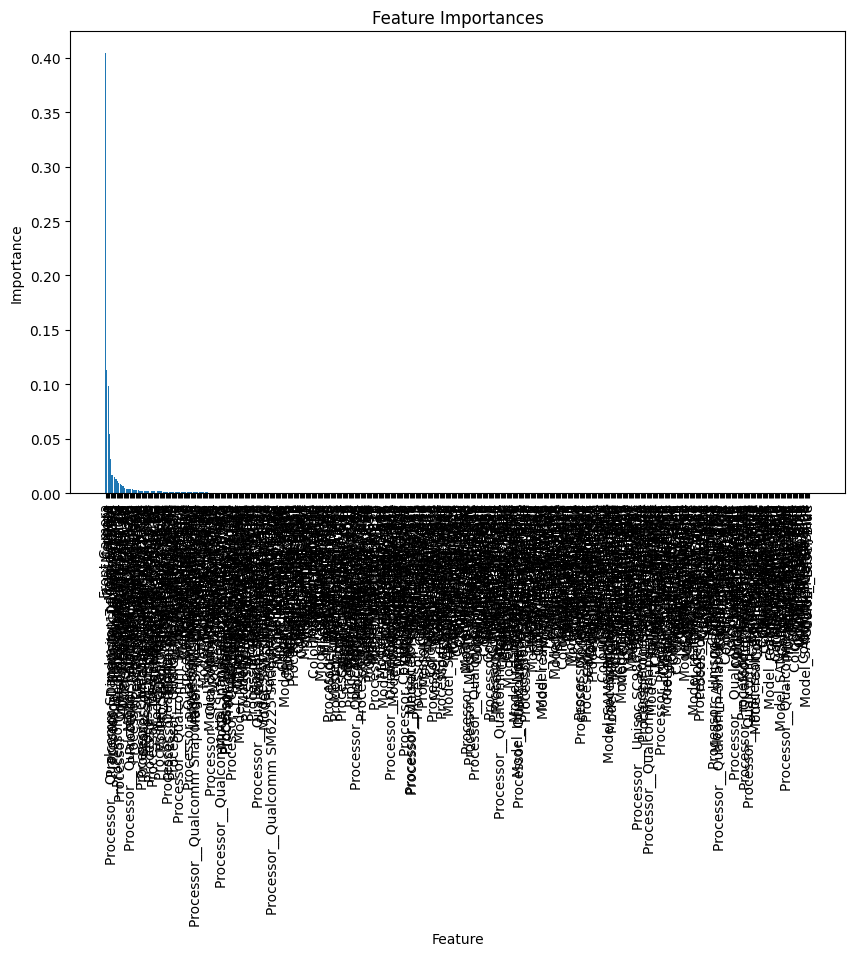

In [100]:
# Plot feature importances and save
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.savefig("feature_importance.png")
plt.show()

In [104]:
# Generate PDF Report
def generate_report():
    pdf_file = "model_report.pdf"
    c = canvas.Canvas(pdf_file, pagesize=letter)
    width, height = letter
    c.setFont("Helvetica", 12)
    
    c.drawString(30, height - 50, "Mobile Price Prediction Report")
    c.drawString(30, height - 70, f"Mean Squared Error: {mse:.2f}")
    c.drawString(30, height - 90, f"Root Mean Squared Error: {rmse:.2f}")
    c.drawString(30, height - 110, f"Mean Absolute Error: {mae:.2f}")
    c.drawString(30, height - 130, f"R^2 Score: {r2:.2f}")
    
    c.drawString(30, height - 170, "Feature Importance Analysis:")
    img_path = "feature_importance.png"
    c.drawImage(img_path, 30, height - 400, width=500, height=300)

In [106]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.
